# Project Topic

This project is from the Kaggle competetion "I’m Something of a Painter Myself".  The goal is described below, taken from the competition site:

>A GAN consists of at least two neural networks: a generator model and a discriminator model. The generator is a neural network that creates the images. For our competition, you should generate images in the style of Monet. This generator is trained using a discriminator.
>
>The two models will work against each other, with the generator trying to trick the discriminator, and the discriminator trying to accurately classify the real vs. generated images.
>
>Your task is to build a GAN that generates 7,000 to 10,000 Monet-style images.

I will do so using Keras and tensorflow.  I will also build out the components.

In [187]:
import numpy as np
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
import gc

import tensorflow as tf
from keras import backend as K

from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
import tensorflow_addons as tfa

#  Data

In [188]:
dir_monet = "../Week 5 Project/data/monet_jpg/"
dir_photo = "../Week 5 Project/data/photo_jpg/"
files_monet = os.listdir(dir_monet)
files_photo = os.listdir(dir_photo)

n1 = len(files_monet)
n2 = len(files_photo)

In [189]:
print("Number of Monet images = ", n1)
print("Number of Landscape images = ", n2)

Number of Monet images =  300
Number of Landscape images =  7038


In [190]:
# Parameters for the notebook

starting_epoch = 0
number_of_epochs = 5 
batch_size = 1 
adam_learning_rate = 0.0001
adam_decay_1 = 0.5 
adam_decay_2 = 0.999 
starting_decay_epoch = 3 
                 

### Functions 

`convert_image_size` is the function to convert normalized image to original scale. `plot_photo` visualize 36 images. `plot_OneLine` plots 6 images in one line. 

In [191]:
# This converts a normalized image back to its normal size
def convert_image_size(image):
    
    new_image = ((np.array(image) + 1)*127.5).astype(int)
    new_image[new_image > 255] = 255
    new_image[new_image < 0] = 0
    
    new_image = new_image.astype(np.uint8)
    
    return new_image

In [192]:
def plot_photo(image):
    
    img2 = ((np.array(image) + 1)*127.5).astype(int)
    img2[img2 > 255] = 255
    img2[img2 < 0] = 0

    
    fig, ax = plt.subplots(6,6, figsize = (15,15))
    
    N = 36
    for k in range(N):
        i =  int(k/6)
        j = k % 6
    
        ax[i,j].imshow(img2[k])
        ax[i,j].tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False)
    

def plot_OneLine(image, title, rescale = False):
    
    img2 = ((np.array(image) + 1)*127.5).astype(int)
    img2[img2 > 255] = 255
    img2[img2 < 0] = 0

    
    fig, ax = plt.subplots(1,6, figsize = (15,2.5))
    
    N = 6
    for k in range(N):
    
        ax[k].imshow(img2[k])
        ax[k].tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False)
        
    
    ax[0].set_title(title)

### Reading images

In [193]:
n2 = 100

In [194]:
M_data = np.zeros((n1,256,256,3)).astype(np.uint8)
F_data = np.zeros((n2,256,256,3)).astype(np.uint8)

In [195]:
for i in range(n1):
    M_data[i] = cv2.cvtColor(cv2.imread(dir_monet + files_monet[i]), cv2.COLOR_BGR2RGB)
    
for i in range(n2):
    F_data[i] = cv2.cvtColor(cv2.imread(dir_photo + files_photo[i]), cv2.COLOR_BGR2RGB)

Images are normalized by following code.

In [196]:
M_data = M_data/(255/2) - 1
F_data = F_data/(255/2) - 1

In [197]:
real_A = M_data[0:36]
real_B = F_data[0:36]

**Monet images**

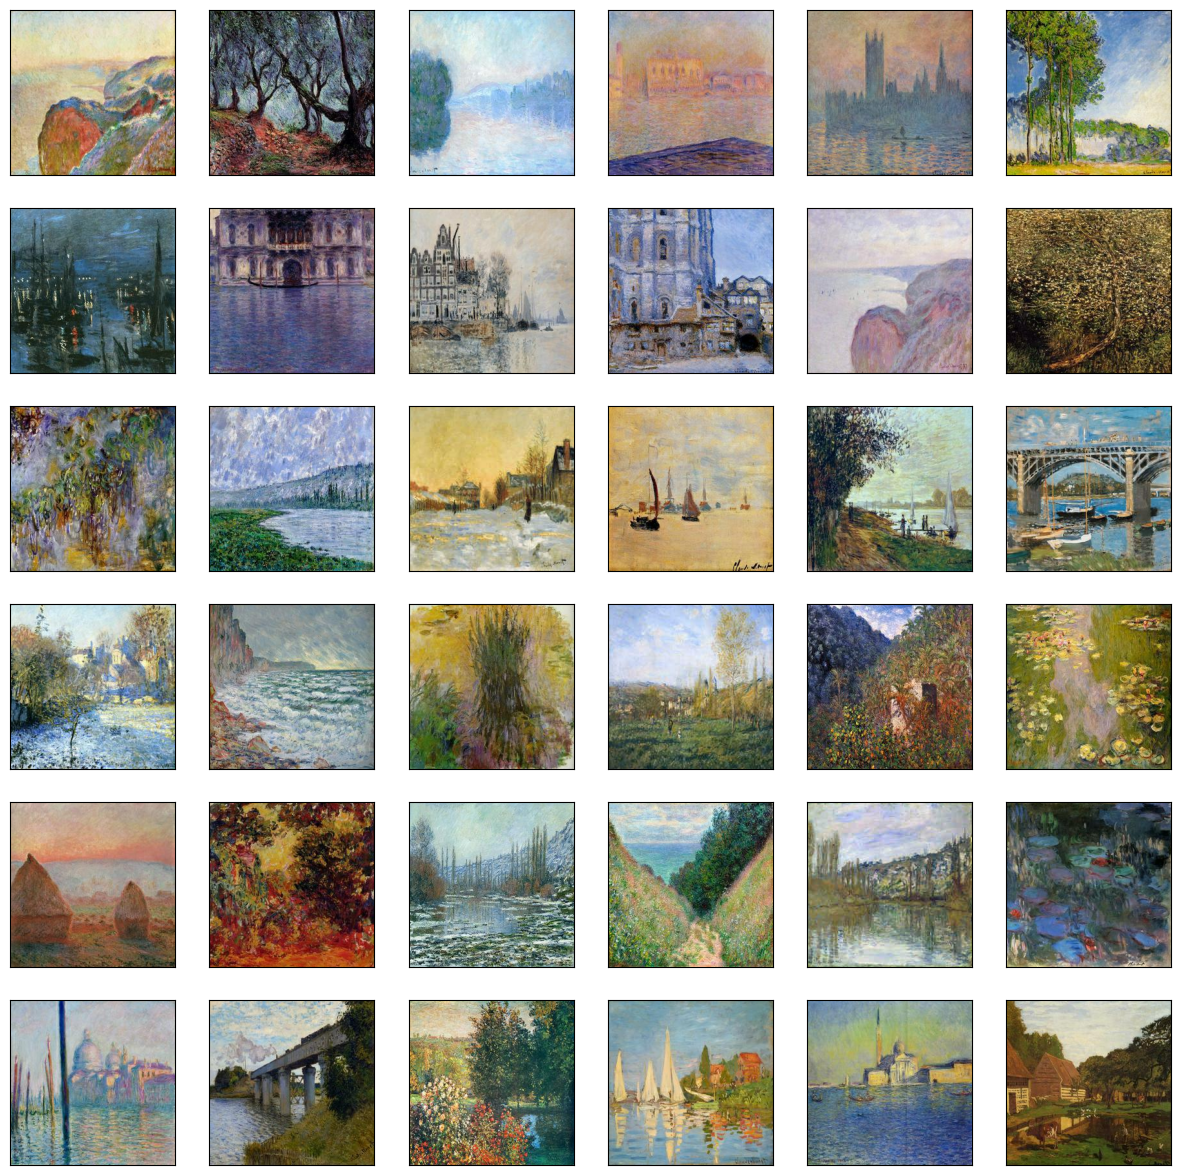

In [198]:
plot_photo(M_data)

**Landscape images**